### Clustering Model

#### Importing libraries

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import pairwise_distances_argmin_min
import numpy as np
import seaborn as sns


#### Loading data

In [2]:
application_rec = pd.read_csv('Data_For_clastering strtified groups.csv')
application_rec.sample(5)

C:\Users\shula\AppData\Local\Temp\ipykernel_22028\1971005602.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  application_rec = pd.read_csv('Data_For_clastering strtified groups.csv')


,Unnamed: 0,index,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
23834,23834,20567,0,0,1,1,135000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,0,Laborers,1,46,1
21588,21588,61165,0,0,1,1,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,1,Laborers,1,52,1
87275,87275,122257,0,0,0,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Core staff,2,36,1
66704,66704,85195,0,1,1,1,1125000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,1,Managers,1,40,1
112092,112092,349161,0,0,0,2,112500.0,Working,Secondary / secondary special,Separated,House / apartment,1,1,0,0,Sales staff,2,36,1


In [3]:
application_rec.reset_index(inplace=True)
application_rec = application_rec.drop(['Unnamed: 0', 'index'], axis=1)

In [4]:
application_rec.sample(5)

,level_0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status
109853,109853,0,0,1,2,135000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Laborers,2,37,1
83082,83082,0,0,1,2,90000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,1,Sales staff,2,28,1
39949,39949,0,0,1,1,270000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,1,44,1
41895,41895,0,0,1,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Managers,1,44,1
75319,75319,0,1,1,1,180000.0,Working,Secondary / secondary special,Single / not married,House / apartment,1,0,0,1,Medicine staff,1,31,1


In [5]:
application_rec = application_rec.dropna()

In [6]:
application_rec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118973 entries, 0 to 118972
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   level_0              118973 non-null  int64  
 1   CODE_GENDER          118973 non-null  int64  
 2   FLAG_OWN_CAR         118973 non-null  int64  
 3   FLAG_OWN_REALTY      118973 non-null  int64  
 4   CNT_CHILDREN         118973 non-null  int64  
 5   AMT_INCOME_TOTAL     118973 non-null  float64
 6   NAME_INCOME_TYPE     118973 non-null  object 
 7   NAME_EDUCATION_TYPE  118973 non-null  object 
 8   NAME_FAMILY_STATUS   118973 non-null  object 
 9   NAME_HOUSING_TYPE    118973 non-null  object 
 10  FLAG_MOBIL           118973 non-null  int64  
 11  FLAG_WORK_PHONE      118973 non-null  int64  
 12  FLAG_PHONE           118973 non-null  int64  
 13  FLAG_EMAIL           118973 non-null  int64  
 14  OCCUPATION_TYPE      118973 non-null  object 
 15  y                

In [7]:
from sklearn.preprocessing import StandardScaler

# One-hot encode the categorical columns
income_types = pd.get_dummies(application_rec['NAME_INCOME_TYPE'], prefix='income')
edu_types = pd.get_dummies(application_rec['NAME_EDUCATION_TYPE'], prefix='education')
family_statuses = pd.get_dummies(application_rec['NAME_FAMILY_STATUS'], prefix='family')
housing_types = pd.get_dummies(application_rec['NAME_HOUSING_TYPE'], prefix='housing')
occupation_types = pd.get_dummies(application_rec['OCCUPATION_TYPE'], prefix='occupation')

# Concatenate the one-hot encoded columns with the binary columns and numeric columns
X = pd.concat([application_rec[['AMT_INCOME_TOTAL', 'AGE', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL',
                     'employment_status', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY']],
               income_types, edu_types, family_statuses, housing_types, occupation_types], axis=1)

X.drop(columns=['FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL'], inplace=True)


# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters
k = 5

# Create the KMeans model
kmeans_model = KMeans(n_clusters=k)

# Fit the model to the scaled data
kmeans_model.fit(X_scaled)

# Get the cluster assignments for each data point
labels = kmeans_model.labels_

# Add the cluster assignments to the original DataFrame
application_rec['cluster'] = labels

# Print the cluster centers
print(kmeans_model.cluster_centers_)
application_rec['cluster'] 

C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[[ 3.15739027e-01 -6.42562463e-02  0.00000000e+00 -8.16865733e-02
   1.11590745e-01  4.59347715e-02  1.26221223e-01  3.73275149e-03
   1.53539584e-01 -5.79846567e-03 -2.12040547e-01  5.29840989e-02
   1.30290084e+00  3.74538560e-01 -7.56333880e-02 -1.39165391e+00
  -4.87669383e-02  1.63827589e-02  1.13605297e-02  2.40087353e-02
  -2.05009527e-02  4.96843962e-02  2.41385567e-01 -1.74890789e-01
   4.88857201e-02 -1.03946031e-02 -2.42306767e-01  2.54205315e-01
  -7.98014689e-02 -1.16130777e-01  2.88967629e-01 -1.78558680e-01
   5.10007226e-02  1.02676268e-01  3.12124452e-02 -3.01516037e-01
  -7.72424269e-02  3.41512590e-01 -1.17301080e-01 -1.83317942e-02
  -6.11736303e-03 -1.15491457e-01  5.70736128e-02 -8.37696361e-02
  -7.60982976e-02]
 [-1.45030187e-01  8.29813342e-02  0.00000000e+00  4.80092448e-02
  -3.33266717e-02  6.28243128e-02 -6.52345038e-02 -9.95204697e-04
  -8.56615190e-02  3.78986001e-03  1.13511605e-01 -2.31997136e-02
  -6.44817056e-01 -1.97282350e-01  3.22006410e-02  6.9435

0         1
1         1
2         1
3         1
4         1
         ..
118968    1
118969    1
118970    1
118971    1
118972    2
Name: cluster, Length: 118973, dtype: int32

In [8]:
application_rec.sample(20)

,level_0,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,y,AGE,employment_status,cluster
60873,60873,0,1,0,1,76500.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Sales staff,1,48,1,1
91780,91780,0,1,0,2,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,27,1,1
100166,100166,0,1,0,2,81000.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Accountants,2,29,1,1
91731,91731,1,0,1,2,198000.0,State servant,Secondary / secondary special,Married,House / apartment,1,0,0,0,Core staff,2,37,1,1
32906,32906,1,0,1,1,157500.0,Working,Incomplete higher,Married,With parents,1,0,1,0,Core staff,1,30,1,4
91940,91940,0,0,1,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Sales staff,2,24,1,1
91569,91569,1,1,1,2,315000.0,Working,Secondary / secondary special,Married,House / apartment,1,1,0,0,Managers,2,41,1,1
19682,19682,0,1,1,1,247500.0,Working,Secondary / secondary special,Married,With parents,1,0,0,0,Managers,1,33,1,4
23887,23887,0,0,1,1,292500.0,Working,Higher education,Married,House / apartment,1,0,0,0,Core staff,1,39,1,0
12572,12572,0,0,1,1,157500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,1,0,Medicine staff,1,48,1,1


In [9]:
application_rec.to_csv("aa.csv")

C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\shula\anaconda3\lib\site-packages\sklearn\clust

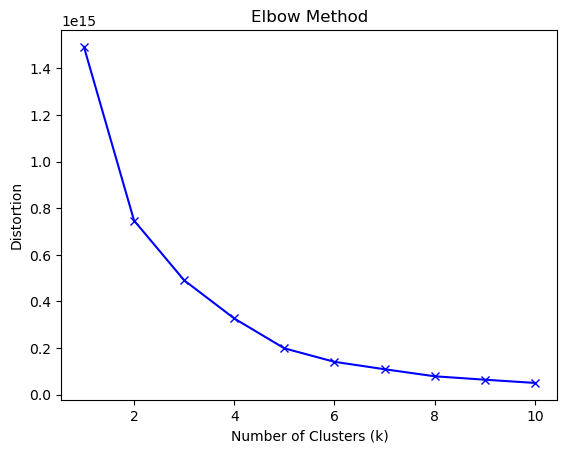

In [10]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
K = range(1, 11)  # Test for different values of k (e.g., 1 to 10)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.title('Elbow Method')
plt.show()

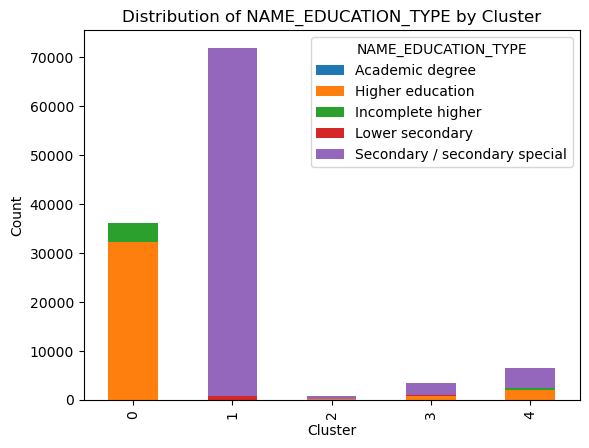

In [11]:
grouped_data = application_rec.groupby(['cluster', 'NAME_EDUCATION_TYPE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_EDUCATION_TYPE by Cluster')

plt.show()

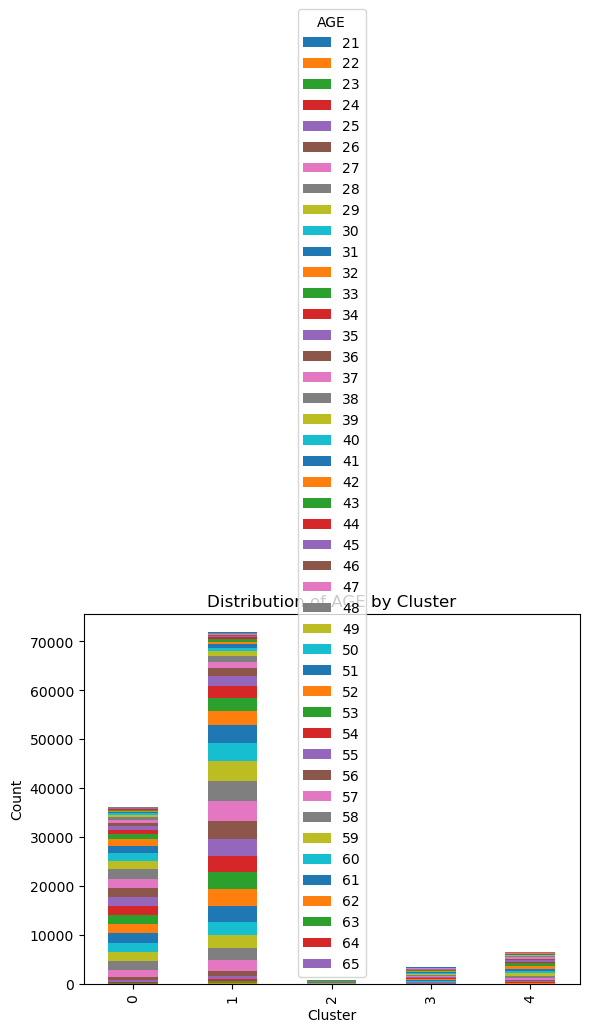

In [12]:
grouped_data = application_rec.groupby(['cluster', 'AGE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of AGE by Cluster')

plt.show()

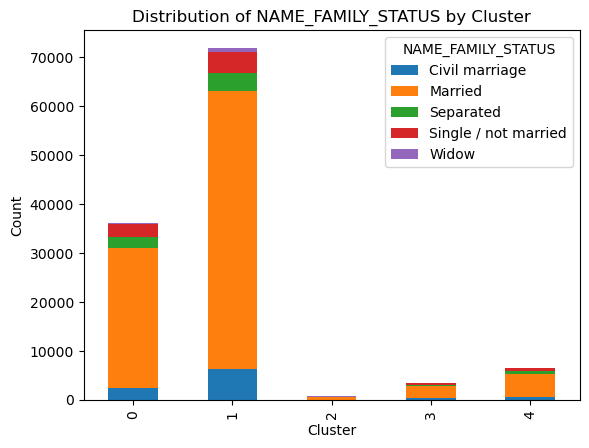

In [13]:
grouped_data = application_rec.groupby(['cluster', 'NAME_FAMILY_STATUS']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_FAMILY_STATUS by Cluster')

plt.show()

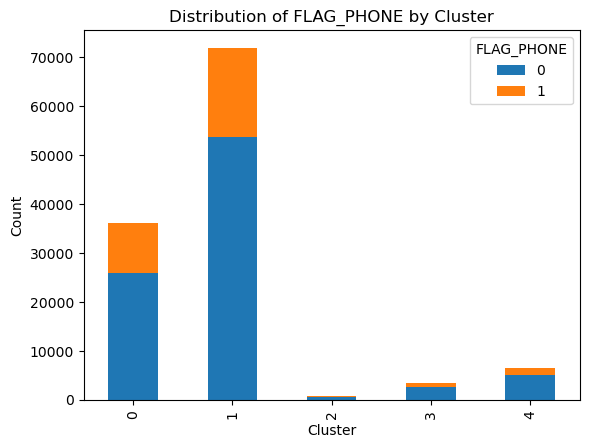

In [14]:
grouped_data = application_rec.groupby(['cluster', 'FLAG_PHONE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of FLAG_PHONE by Cluster')

plt.show()

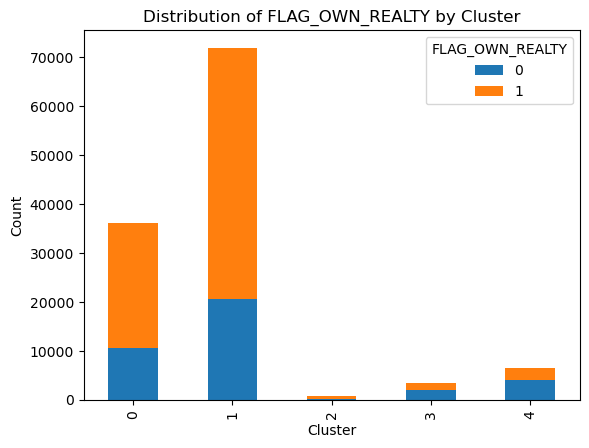

In [15]:
grouped_data = application_rec.groupby(['cluster', 'FLAG_OWN_REALTY']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of FLAG_OWN_REALTY by Cluster')

plt.show()

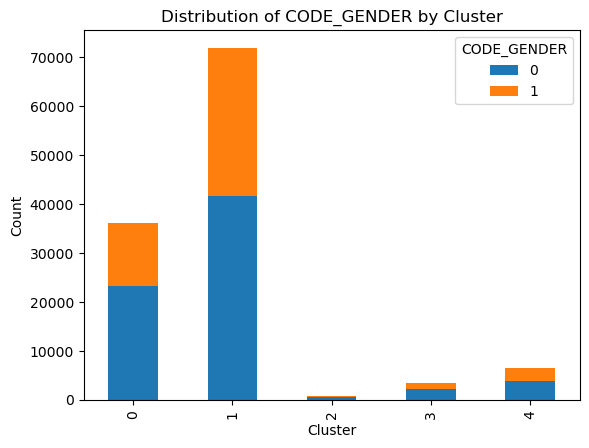

In [16]:

grouped_data = application_rec.groupby(['cluster', 'CODE_GENDER']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of CODE_GENDER by Cluster')

plt.show()

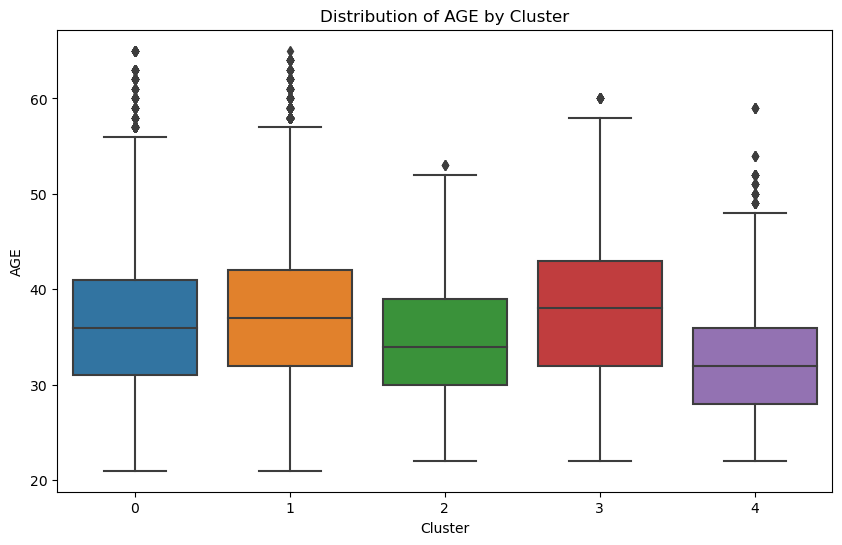

In [17]:


# Create a box plot to visualize the distribution of speed limits for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='AGE', data=application_rec)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('AGE')
plt.title('Distribution of AGE by Cluster')

# Show the plot
plt.show()

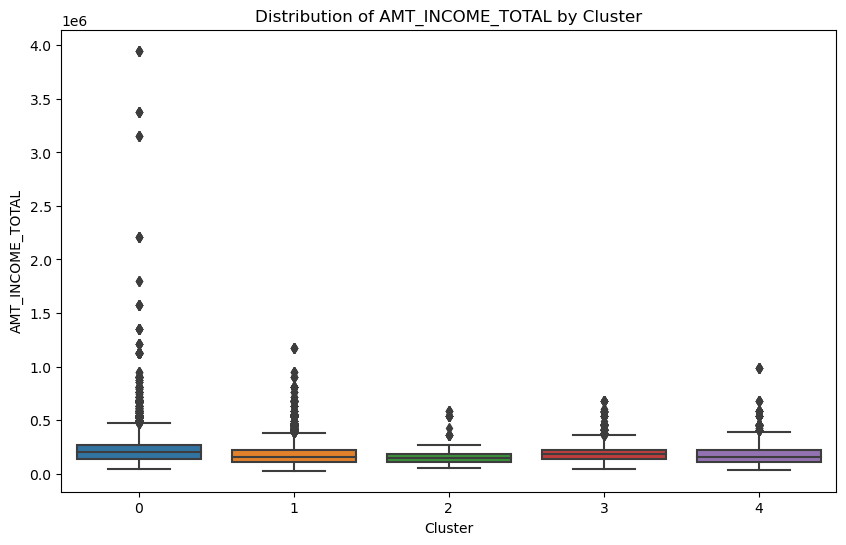

In [18]:

# Create a box plot to visualize the distribution of speed limits for each cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='AMT_INCOME_TOTAL', data=application_rec)

# Customize the plot
plt.xlabel('Cluster')
plt.ylabel('AMT_INCOME_TOTAL')
plt.title('Distribution of AMT_INCOME_TOTAL by Cluster')

# Show the plot
plt.show()

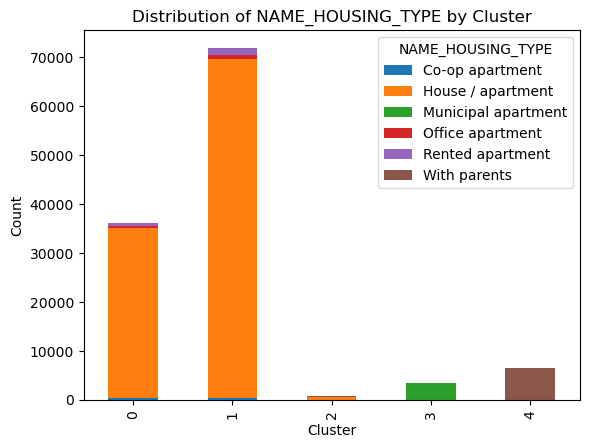

In [19]:


grouped_data = application_rec.groupby(['cluster', 'NAME_HOUSING_TYPE']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of NAME_HOUSING_TYPE by Cluster')

plt.show()

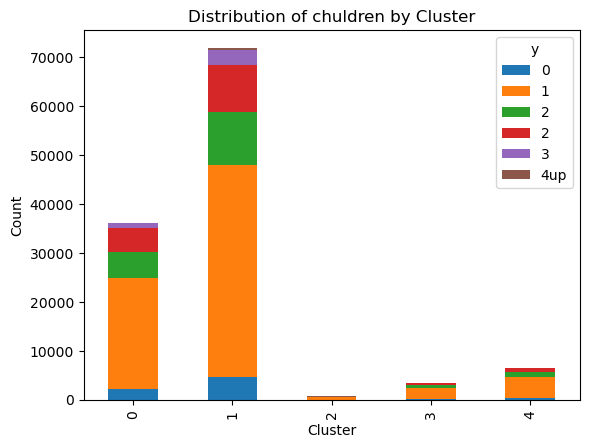

In [20]:

grouped_data = application_rec.groupby(['cluster', 'y']).size().unstack()


grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Distribution of chuldren by Cluster')

plt.show()



In [ ]:
# Filter the data to include only years above 1990
filtered_data = application_rec['AMT_INCOME_TOTAL']

# Group the filtered data by 'Vehicle Year' and 'Cluster' and calculate the counts
grouped_data = filtered_data
#.groupby(['Vehicle Year', 'Cluster']).size().unstack()
# Get the unique clusters
clusters = application_rec['cluster'].unique()

# Set the x-axis as the 'Vehicle Year'
x = grouped_data.index

# Set the width of each bar
bar_width = 0.8 / len(clusters)

# Plot the bars for each cluster
plt.figure(figsize=(12, 6))
for i, cluster in enumerate(clusters):
    plt.bar(x + i * bar_width, grouped_data[cluster], width=bar_width, label=f'Cluster {cluster}')

# Customize the plot
plt.xlabel('Vehicle Year')
plt.ylabel('Quantity')
plt.title('Quantity of Vehicles by Year and Cluster')
plt.legend()

# Show the plot
plt.show()


C:\Users\shula\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


# Hierarchical clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Define the data


# Define the number of clusters
n_clusters = 5

# Create an AgglomerativeClustering instance
agglomerative = AgglomerativeClustering(n_clusters=n_clusters)

# Fit the AgglomerativeClustering model to the data
agglomerative.fit(X_scaled)

# Retrieve the cluster labels
labels = agglomerative.labels_

# Print the labels
print(labels)


# DBSCAN 
####  The label -1 represents noise/outliers.


Note: DBSCAN does not require you to specify the number of clusters in advance, as it discovers clusters based on density.

In [ ]:
from sklearn.cluster import DBSCAN
import numpy as np

# Define the data


# Define the parameters for DBSCAN
eps = 10# Maximum distance between two samples to be considered as neighbors
min_samples = 100  # Minimum number of samples in a neighborhood to be considered a core point

# Create a DBSCAN instance
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the DBSCAN model to the data
dbscan.fit(X_scaled)

# Retrieve the cluster labels
labels = dbscan.labels_

# Print the labels
print(labels)
